# Predict Age of Respondants.

Name of DataSet: NHANES Age Prediction 

URL: https://archive.ics.uci.edu/dataset/887/national+health+and+nutrition+health+survey+2013-2014+(nhanes)+age+prediction+subset

Type: Classification

Domain: Health and Medicine

Size: 10 columns 6287 rows

Target variable : age_group	

## DATA COLLECTION

In [2]:
def collect(dataset):
    #importing pandas library
    import pandas as pd
    #loading our dataset
    df = pd.read_csv(dataset)
    return df
    
data = collect('NHANES_age_prediction.csv')

In [3]:
data

,SEQN,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,73564.0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,73568.0,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,73576.0,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,73577.0,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,73580.0,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...,...
2273,83711.0,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,83712.0,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,83713.0,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,83718.0,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


## DATA CLEANING

### Removing Columns.

In [4]:
def remove_col(data,col):
    #removing unnecessary columns
    data=data.drop([col],axis=1)
    return data
# In this case we will remove the column 'SEQN' as it is irrelevant
data=remove_col(data,'SEQN')

In [5]:
data

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,Adult,61.0,2.0,2.0,35.7,110.0,2.0,150.0,14.91
1,Adult,26.0,2.0,2.0,20.3,89.0,2.0,80.0,3.85
2,Adult,16.0,1.0,2.0,23.2,89.0,2.0,68.0,6.14
3,Adult,32.0,1.0,2.0,28.9,104.0,2.0,84.0,16.15
4,Adult,38.0,2.0,1.0,35.9,103.0,2.0,81.0,10.92
...,...,...,...,...,...,...,...,...,...
2273,Adult,38.0,2.0,2.0,33.5,100.0,2.0,73.0,6.53
2274,Adult,61.0,1.0,2.0,30.0,93.0,2.0,208.0,13.02
2275,Adult,34.0,1.0,2.0,23.7,103.0,2.0,124.0,21.41
2276,Adult,60.0,2.0,2.0,27.4,90.0,2.0,108.0,4.99


### Checking Data types.

In [6]:
def check_dtype():
    #checking data types of all columns to see any inconsistency in data
    return data.dtypes
check_dtype()

age_group     object
RIDAGEYR     float64
RIAGENDR     float64
PAQ605       float64
BMXBMI       float64
LBXGLU       float64
DIQ010       float64
LBXGLT       float64
LBXIN        float64
dtype: object

The code above shows that the we need to change the data type of the column 'Stage' but first we will
handle the missing values.

### Handling Missing Values.

In [7]:
def check_null():
    # checking null values in all columns
    return data.isnull().sum()
check_null()

age_group    0
RIDAGEYR     0
RIAGENDR     0
PAQ605       0
BMXBMI       0
LBXGLU       0
DIQ010       0
LBXGLT       0
LBXIN        0
dtype: int64

In [8]:
def fill_missing():
    # handling all missing values.
    for col in data.columns:
        # missing values in numerical columns are replaced with mean
        if data[col].dtype == float:
            mean=data[col].mean()
            data[col]= data[col].fillna(mean)
        # missing values in discrete columns are replaced with median
        if data[col].dtype == int:
            median=data[col].median()
            data[col]= data[col].fillna(median)
        # missing values in categorical columns are replaced with mode
        if data[col].dtype == object:
            mode=data[col].mode().iloc[0]
            data[col]= data[col].fillna(mode)
    return data
# There are no missing values so this function not needed.

### Changing Data Types.


In [9]:
def change_dtype(data,col,dtype):
    # changing data type of the desired column. 
    data[col]=data[col].astype(dtype)
    return data[col]
# here we dont need to change the data type of any column.

## DATA TRANSFORMATION

### Changing Feature Names

In [10]:
def rename_feature(data,column_mapping):
    # This function changes names of columns
    # It takes two inputs: data and a dictionary where keys are old column names and values are new column names.
    return data.rename(columns=column_mapping,inplace=True)
# Here we dont have to change column names.

### Separating Categorical and Numerical data.

We need to separate categorical and numerical variables to Normalize, Standardize and Perform EDA. 

In [11]:
def sep_col(data):
    # this function separates categorical and numerical columns of our data.
    categorical_columns = data.select_dtypes(include=['object']).columns
    numerical_columns = data.select_dtypes(exclude=['object']).columns
    return categorical_columns,numerical_columns
categorical_columns,numerical_columns=sep_col(data)

In [12]:
# accessing the categorical columns
categorical_columns

Index(['age_group'], dtype='object')

In [13]:
# # accessing the categorical columns
numerical_columns

Index(['RIDAGEYR', 'RIAGENDR', 'PAQ605', 'BMXBMI', 'LBXGLU', 'DIQ010',
       'LBXGLT', 'LBXIN'],
      dtype='object')

### Label Encoding

In [14]:
# Making all the necessary imports.
from numpy import array
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [15]:

def encode():
    # this function standardize all categorical columns using builtin Python sklearn's LabelEncoder.
    for col in categorical_columns:
        data[col]=label_encoder.fit_transform(data[col])
    return data

data=encode()

### Standardization (Using Z-Score)


In [16]:
# Making all necessary imports
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [17]:
def standardize():
    # This function standarizes all numerical columns using built in StandaedScaler
    for col_name in numerical_columns:
        data[col_name]=scaler.fit_transform(data[[col_name]]).round(2)
    return data
data=standardize()

In [18]:
data

,age_group,RIDAGEYR,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
0,0,0.95,0.98,0.44,1.07,0.58,-0.09,0.74,0.32
1,0,-0.78,0.98,0.44,-1.06,-0.59,-0.09,-0.74,-0.82
2,0,-1.28,-1.02,0.44,-0.66,-0.59,-0.09,-1.00,-0.59
3,0,-0.49,-1.02,0.44,0.13,0.25,-0.09,-0.66,0.44
4,0,-0.19,0.98,-2.06,1.10,0.19,-0.09,-0.72,-0.09
...,...,...,...,...,...,...,...,...,...
2273,0,-0.19,0.98,0.44,0.77,0.02,-0.09,-0.89,-0.55
2274,0,0.95,-1.02,0.44,0.28,-0.37,-0.09,1.98,0.12
2275,0,-0.39,-1.02,0.44,-0.59,0.19,-0.09,0.19,0.99
2276,0,0.90,0.98,0.44,-0.08,-0.53,-0.09,-0.15,-0.70


# EDA

Plotting Boxplots and histograms of the features relevant to our data.

In [19]:
# Making neceesary imports.
from matplotlib import pyplot as plt
import seaborn as sns

RIDAGEYR in not relevant to so we will not plot it

In [20]:
def drop_col(numerical_columns,col):
    # This function removes the irrelevant column from the subdataset numerical_columns.
    numerical_columns=numerical_columns.drop(col)
    return numerical_columns

# We are dropping 'N_Days' as it is not a relevant feature.
numerical_columns=drop_col(numerical_columns,'RIDAGEYR')

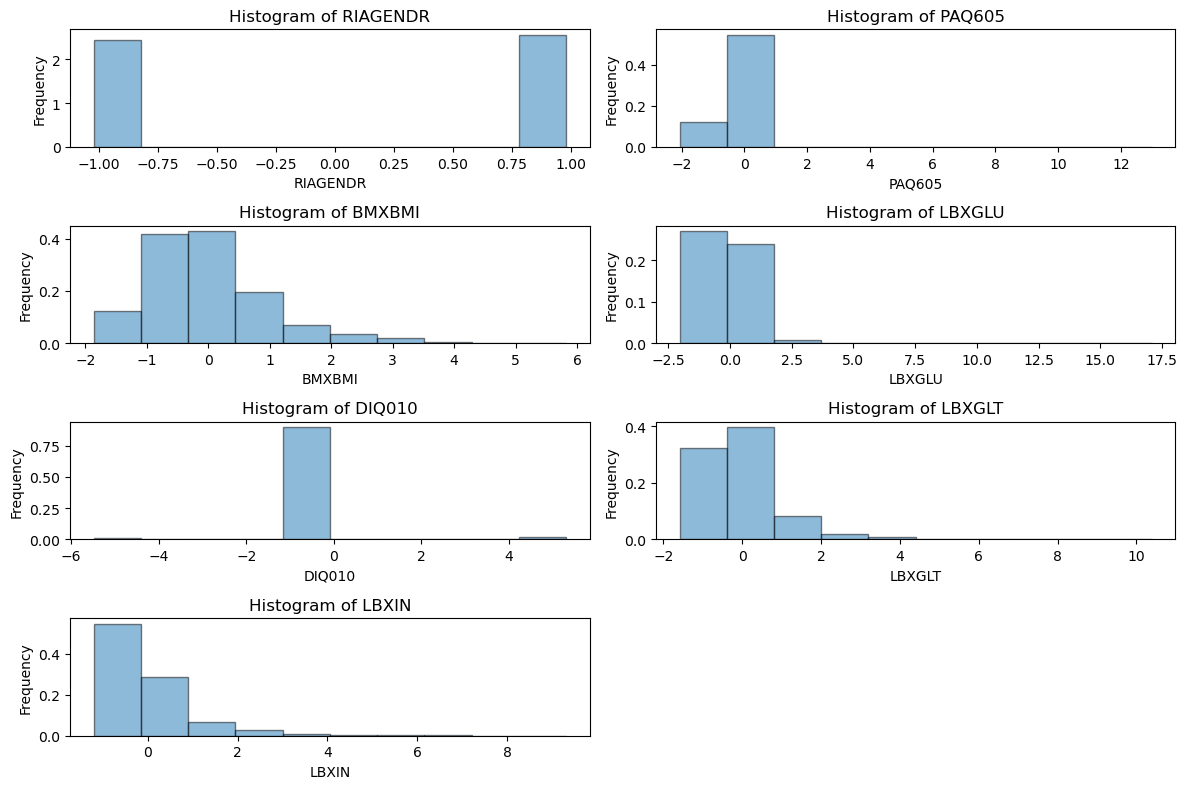

In [21]:
def plot_histogram():
    # This function plots histograms of all the numerical variables.
    num_cols = len(numerical_columns)
    rows = num_cols // 2 + num_cols % 2  # Adjusting rows based on columns to display as subplots. 

    fig, axes = plt.subplots(rows, 2, figsize=(12, 2 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        axes[i].hist(data[col], density=True, alpha=0.5, edgecolor='black')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Histogram of {col}')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_histogram()


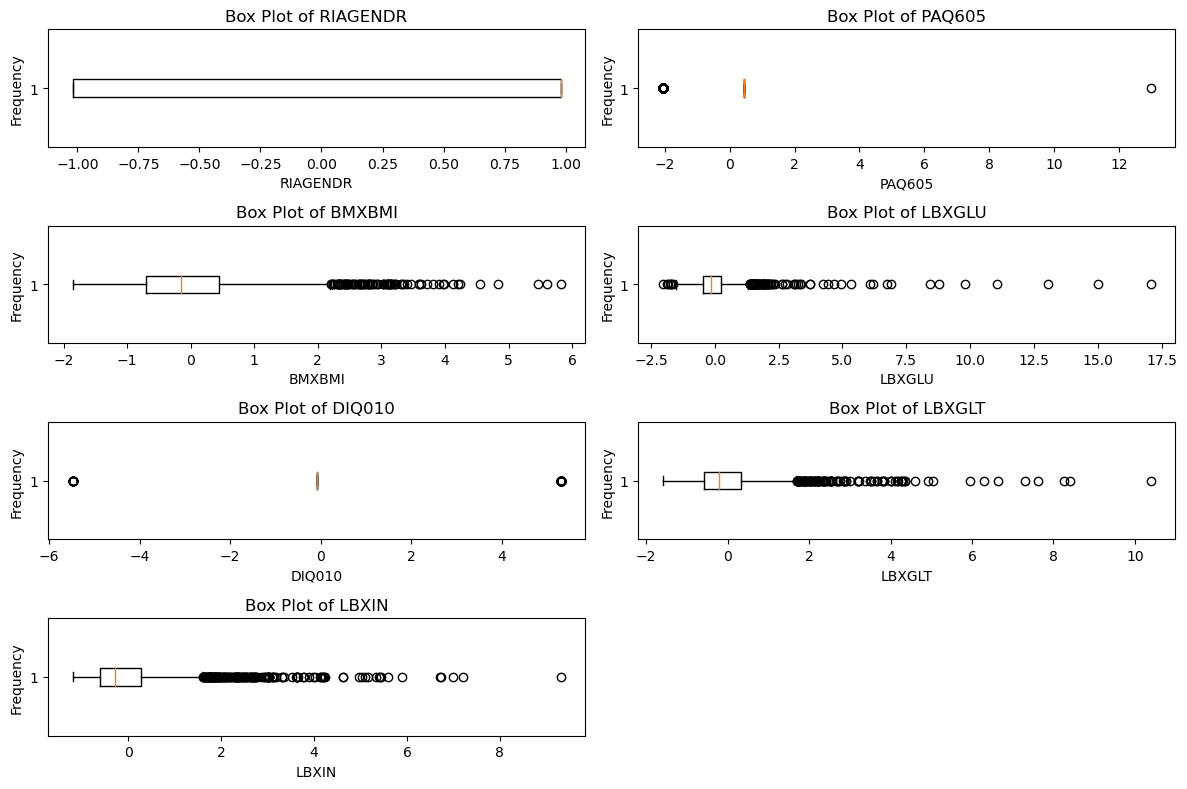

In [22]:
def plot_boxplot():
    # This function plots the BoxPlots of all the numerical variables.
    num_cols = len(numerical_columns)
    rows = num_cols // 2 + num_cols % 2  # Adjust rows based on the number of numerical columns

    fig, axes = plt.subplots(rows, 2, figsize=(12, 2 * rows))
    axes = axes.flatten()

    for i, col in enumerate(numerical_columns):
        axes[i].boxplot(data[col],vert=False)
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frequency')
        axes[i].set_title(f'Box Plot of {col}')

    # Hide any remaining empty subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

plot_boxplot()


In [23]:
def five_num_summ(data):
    # This function return the five number summary of our dataset.
    return data.describe()
# we need 5 number summary of our numerical_columns
five_num_summ(data[numerical_columns])
    

,RIAGENDR,PAQ605,BMXBMI,LBXGLU,DIQ010,LBXGLT,LBXIN
count,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000,2278.000000
mean,0.002827,-0.003354,-0.000013,-0.000154,-0.002454,0.000040,-0.000057
std,0.999959,0.997523,1.000236,1.000185,1.000144,1.000191,1.000250
min,-1.020000,-2.060000,-1.860000,-2.040000,-5.480000,-1.590000,-1.200000
25%,-1.020000,0.440000,-0.710000,-0.480000,-0.090000,-0.590000,-0.610000
50%,0.980000,0.440000,-0.160000,-0.140000,-0.090000,-0.210000,-0.290000
75%,0.980000,0.440000,0.450000,0.250000,-0.090000,0.320000,0.270000
max,0.980000,12.980000,5.820000,17.080000,5.300000,10.390000,9.310000


### INTERPRETATION

Histograms show: 
  1. RIAGENDR has extreme values. Either too high or too low. No middle values.
  2. Most of the values for PAQ605, LBXGLT and LBXGLU are close to the mean value but there are some outliers in the data. 
  3. BMBXMI is almost normally distributed but it is skewed to the left, again due to outliers.
  4. Most of the values for LBXIN are close to the minimum value that is, it is negatively skewed.
  
Boxplots validate our interpretation of histogram by detecting outliers. They show that:
  1. The presence of outliers cause the data of LBXGLU, BMXBMI and LBXGLT to be negatively skewed.
  2. Boxplots of DIQ010 and PAQ605 barely have any box and whiskers, showing that all the data is closer to the median values        but there are some very large outliers.
  
The five number summary show that for RIAGENDR median and upper quartile and max values all are same while lower quartile = min value. This means that there are only two data points and the maximum value occurs more frequently.


### Detecting Outliers

In [24]:
def df_num_col(data):
    # The purpose of this fucntion is to create a dataframe of numerical columns of our data.
    df=data
    return df
df=df_num_col(data[numerical_columns])

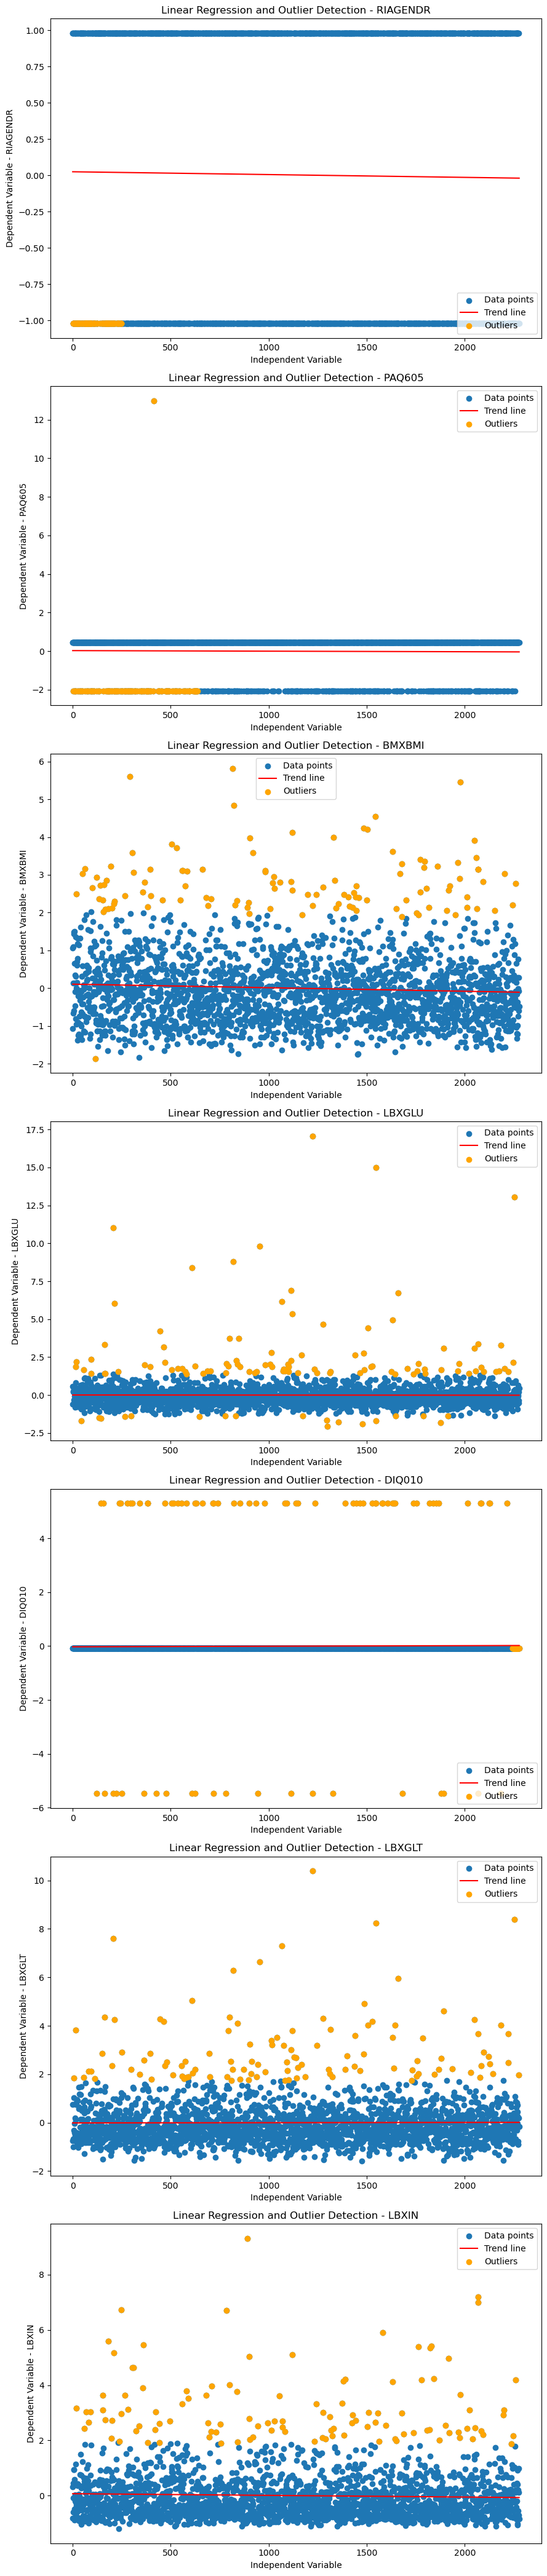

In [25]:
import numpy as np
def detect_outl(df):
    # This function creates scatter plots of all numerical variables that identifies each point as 
    # either a data point or an outlier
    
    num_plots = len(numerical_columns)
    fig, axes = plt.subplots(num_plots, 1, figsize=(9, 6 * num_plots))


    for i, col in enumerate(numerical_columns):
        X = np.arange(len(df)).reshape(-1, 1)  # Independent variable
        y = df[col].values.reshape(-1, 1)  # Dependent variable

        # Linear regression is performed using numpy.
        coefficients = np.polyfit(X.flatten(), y.flatten(), 1)
        trend_line = np.polyval(coefficients, X.flatten())

        # Residuals are calculated.
        residuals = y - trend_line.reshape(-1, 1)

        # A threshold is set based on the 95th percentile 
        # Quantiles are used to set the threshold. 
        # Outliers are set as those data points that are beyond the 95th percentile of the residuals.
        threshold = np.percentile(np.abs(residuals), 95)

        # Outliers are identified based on residuals.
        outlier_mask = np.abs(residuals) > threshold
        outliers = df[outlier_mask.flatten()]

        # PData points and the trend line is plotted.
        axes[i].scatter(X, y, label='Data points')
        axes[i].plot(X, trend_line, color='red', label='Trend line')
        axes[i].scatter(X[outlier_mask], y[outlier_mask], color='orange', label='Outliers')
        axes[i].set_xlabel('Independent Variable')
        axes[i].set_ylabel(f'Dependent Variable - {col}')
        axes[i].set_title(f'Linear Regression and Outlier Detection - {col}')
        axes[i].legend()
    plt.tight_layout()
    plt.show()
    
detect_outl(df)



The scatter plots above can easily show all the outliers. All the yellow points are the outliers. 
Outliers are set as all those data points that are beyond the 95th percentile of the data.


## Feature Engineering

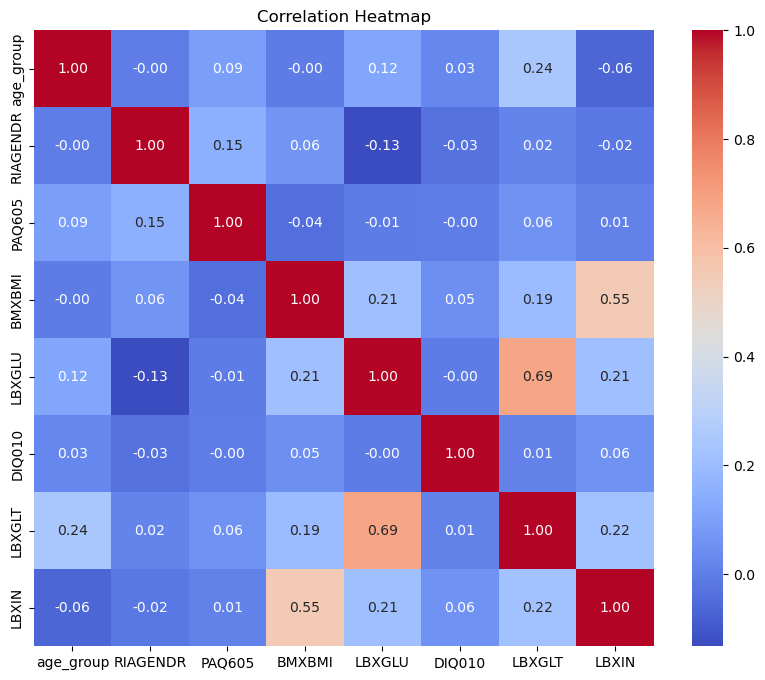

In [26]:
def feature_eng(target,df):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming 'target_column' is your target variable and 'feature_columns' are your feature columns
    target_column = target
    feature_columns = df

    # Extract the subset of data containing only the features and the target variable
    data_subset = data[[target_column] + feature_columns]

    # Calculate the correlation matrix
    correlation_matrix = data_subset.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

feature_eng('age_group',numerical_columns.to_list())

## Dimensionality Reduction

## Model Selection
The model we will use to do machine learning is KNN. 

## Model Training

After selection of model, the next step is to determine the target variable (label) and the relevant features i.e., X and Y.
In our case, label (Y) is 'age_group' and all the other numerical features that we have not dropped are the features (X).

To train and fit the model, first we will split our data manually and evaluate its performance
Then we will split using Cross Validation and then reevaluate the performance of our model.



### Manual Splitting:

In [30]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def fit_model(data,target,k):
    
    #This fucntion fits a model KNN to our data. 
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is spit into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    X_train = np.ascontiguousarray(X_train)
    X_val = np.ascontiguousarray(X_val)
    X_test = np.ascontiguousarray(X_test)

    # Instantiate the KNN classifier with the desired number of neighbors. 
    # We are taking k=5
    knn_model = KNeighborsClassifier(n_neighbors=k)

    # the hyperparameters used in this case are: k=5 and distance metric is euclidean distance
    # which is the default metric in scikit=learn's KNeighborsClassifier.

    # Fit the model to the training data
    knn_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred= knn_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    print(f"Train Accuracy: {accuracy_train}")

    # Make predictions on the validation set
    y_val_pred = knn_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    print(f"Validation Accuracy: {accuracy_val}")

    # Make predictions on the test set
    y_test_pred = knn_model.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    print(f"Test Accuracy: {accuracy_test}")

fit_model(data,'age_group',5)

Train Accuracy: 0.9714494875549048
Validation Accuracy: 0.9473684210526315
Test Accuracy: 0.9407894736842105


### Cross-Validation:

In [31]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def fit_model_cv(data,target,k,KF):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    features = data.drop(columns=[target])
    X = features.values
    y = data[target_column_name].values

    # Number of neighbors for KNN
    k_neighbors = k
    # Number of folds for cross-validation
    num_folds = KF

    # Create KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k_neighbors)

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize a variable to store overall accuracy
    overall_accuracy = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train KNN model
        knn.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = knn.predict(X_test)

        # Calculate accuracy for this fold
        fold_accuracy = accuracy_score(y_test, predictions)
        print(f"Accuracy of Fold {fold}: {fold_accuracy}")

        # Add fold accuracy to overall accuracy
        overall_accuracy += fold_accuracy

    # Calculate and print average accuracy across all folds
    average_accuracy = overall_accuracy / num_folds
    print("\nAverage Accuracy:", average_accuracy)

fit_model_cv(data,'age_group',5,10)

Accuracy of Fold 1: 0.9517543859649122
Accuracy of Fold 2: 0.956140350877193
Accuracy of Fold 3: 0.9342105263157895
Accuracy of Fold 4: 0.9517543859649122
Accuracy of Fold 5: 0.956140350877193
Accuracy of Fold 6: 0.9736842105263158
Accuracy of Fold 7: 0.9473684210526315
Accuracy of Fold 8: 0.9429824561403509
Accuracy of Fold 9: 0.9647577092511013
Accuracy of Fold 10: 0.9691629955947136

Average Accuracy: 0.9547955792565114


### INTERPRETATION

The model performs really well for train, validation and test data as the accuracy drops from 97% to only 94% from training to testing data. 

There may be a concern of overfitting so we also analysed the performance of our model by cross validation.
However, the model performs equally well on cross validation of ten folds and the average accuracy is 95%. This proves that the generalizibilty of our model is high.

Hence, we can expect the model to perform well on live data as well, as it seems to have understood the patterns of data.






.





## Model Evaluation

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_classification(y_true, y_pred_prob):
    """
    Evaluate a classification model and generate various performance metrics.

    Parameters:
        y_true (array-like): True labels of the data.
        y_pred_prob (array-like): Predicted probabilities of the positive class.

    Returns:
        dict: A dictionary containing precision, recall, F1-score, accuracy, AUC, and ROC curve data.
    """
    # Calculate precision, recall, and F1-score for each class
    precision = precision_score(y_true, y_pred_prob.argmax(axis=1), average=None)
    recall = recall_score(y_true, y_pred_prob.argmax(axis=1), average=None)
    f1 = f1_score(y_true, y_pred_prob.argmax(axis=1), average=None)

    # Calculate overall accuracy
    accuracy = accuracy_score(y_true, y_pred_prob.argmax(axis=1))

    # Calculate AUC
    auc = roc_auc_score(y_true, y_pred_prob[:, 1])

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:, 1])

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Create a dictionary to store the evaluation metrics
    evaluation_metrics = {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'accuracy': accuracy,
        'auc': auc,
        'roc_curve': {'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds}
    }

    return evaluation_metrics

## ML PIPELINE

In [ ]:
def master():
    collect(dataset)
    remove_col(data,col)
    check_dtype()
    check_null()
    fill_missing()
    change_dtype(data,col,dtype)
    rename_feature(data,column_mapping)
    sep_col(data)
    encode()
    standardize()
    drop_col(numerical_columns,col)
    select_col(numerical_columns, cols_to_keep)
    plot_histogram()
    plot_boxplot()
    five_num_summ(data)
    df_num_col(data)
    detect_outl(df)
    fetaure_eng()
    dim_red()
    select_model()
    fit_model(data,target,k)
    fit_model_cv(data,target,k,KF)
    model_eval()